In [207]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm

In [208]:
# Read File
Bike_df = pd.DataFrame(pd.read_csv("day.csv"))
Bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [209]:
Bike_df.shape

(730, 16)

In [210]:
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [211]:
Bike_df.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [212]:
Bike_df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [213]:
cont_cols=["instant","dteday","temp","atemp","hum","windspeed","casual","registered"]
cat_cols=["season","yr","holiday","mnth","weekday","workingday","weathersit"]
target = ["cnt"]

In [214]:
len(cont_cols)+len(cat_cols)+len(target)

16

# EDA

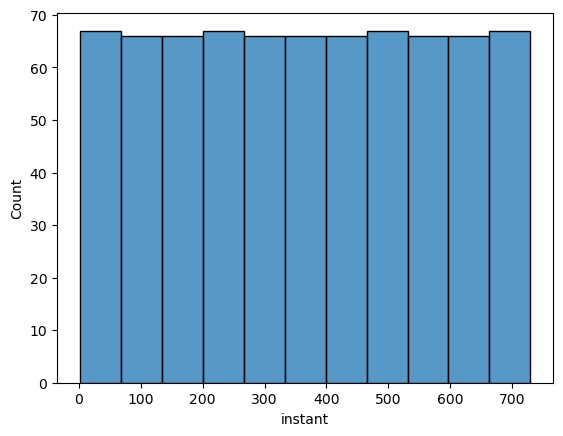

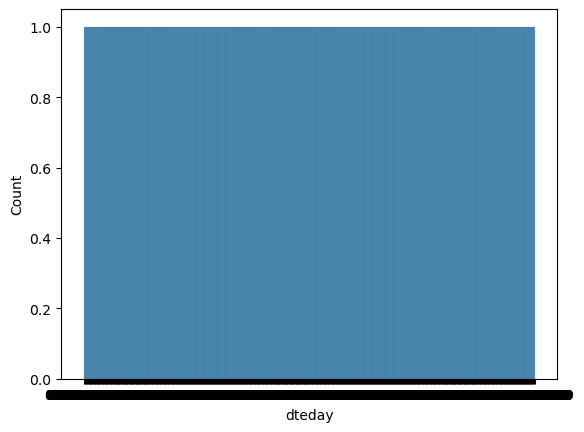

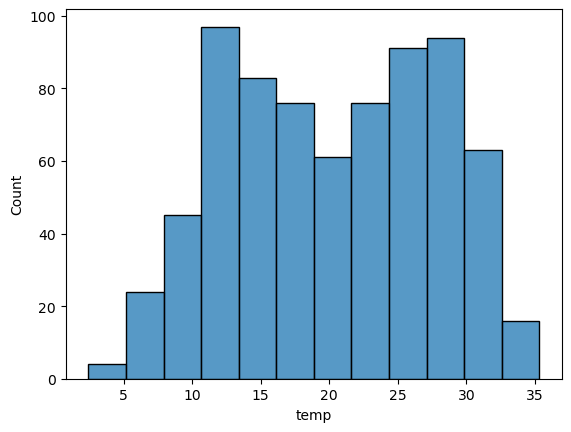

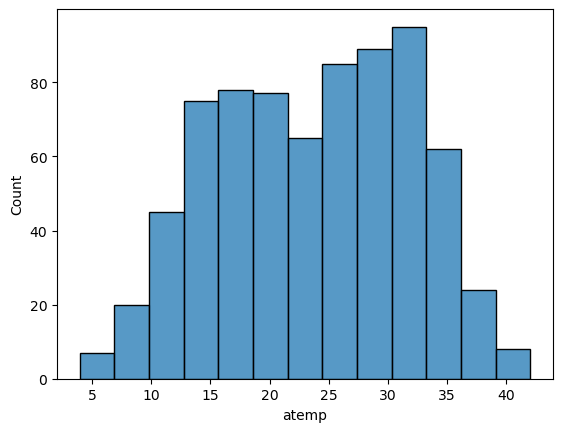

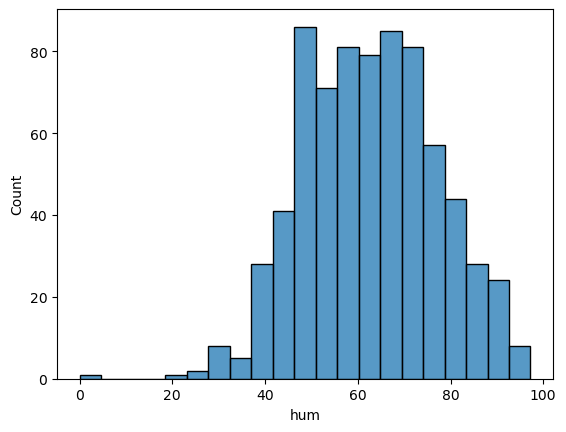

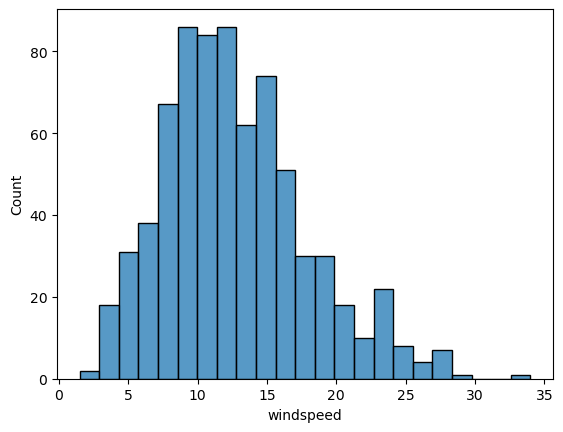

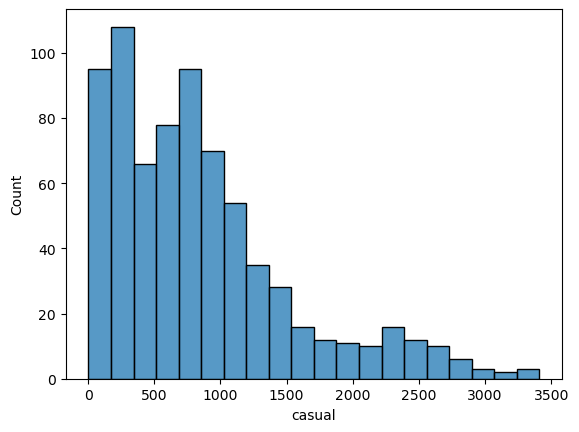

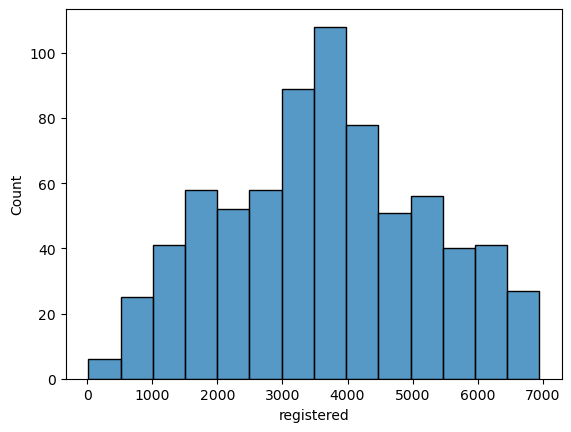

In [215]:
for i in cont_cols:
    sns.histplot(x=Bike_df[i])
    plt.show()

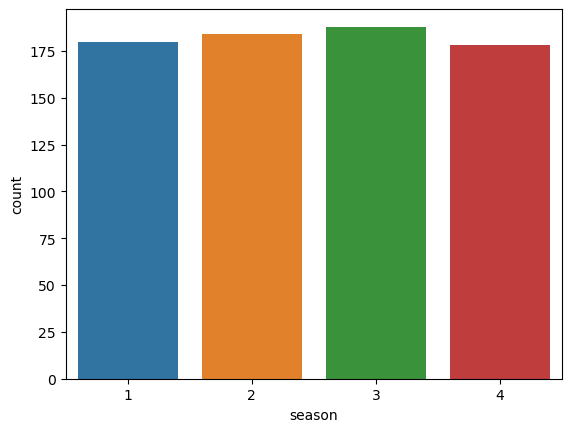

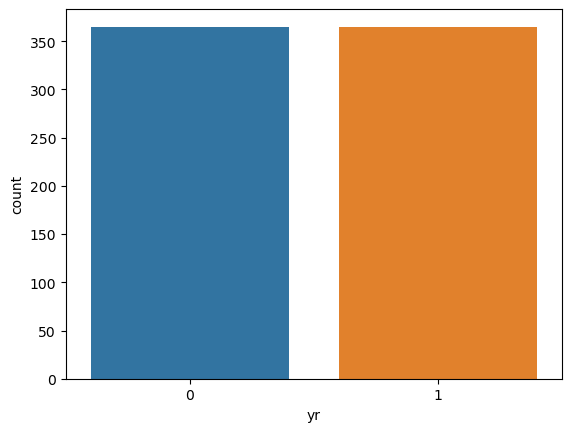

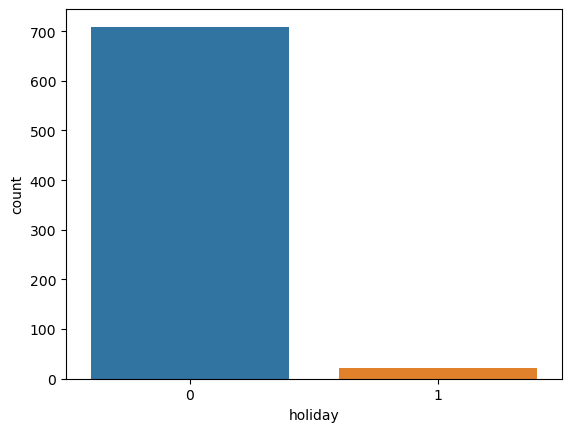

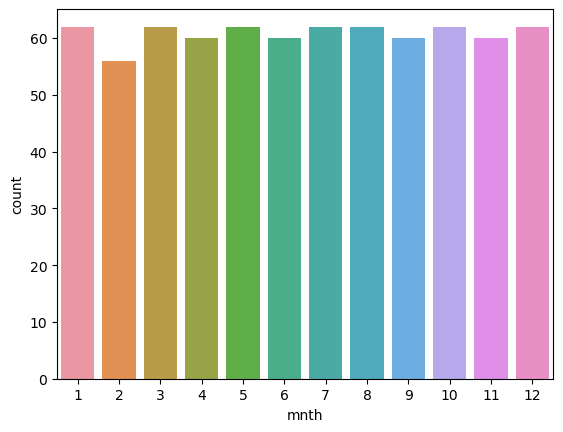

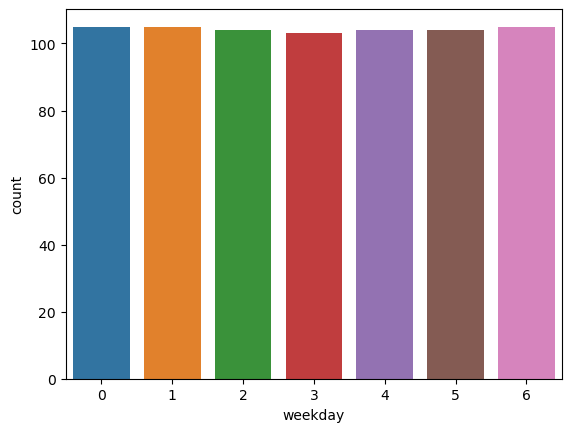

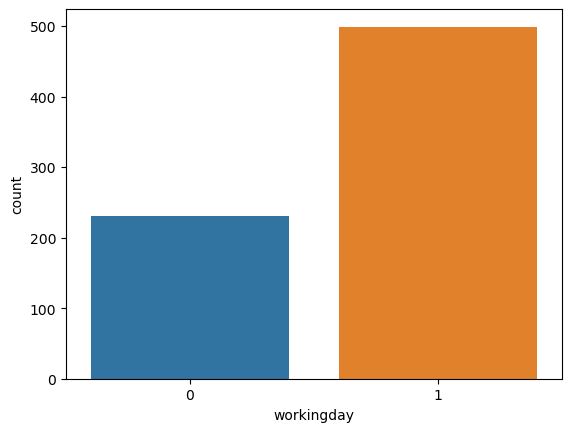

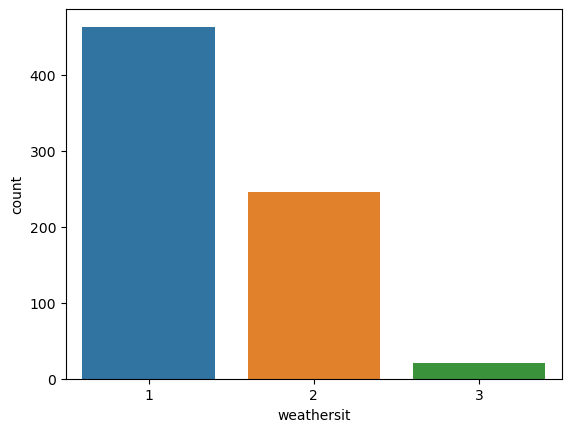

In [216]:
for i in cat_cols:
    sns.countplot(x=Bike_df[i])
    plt.show()

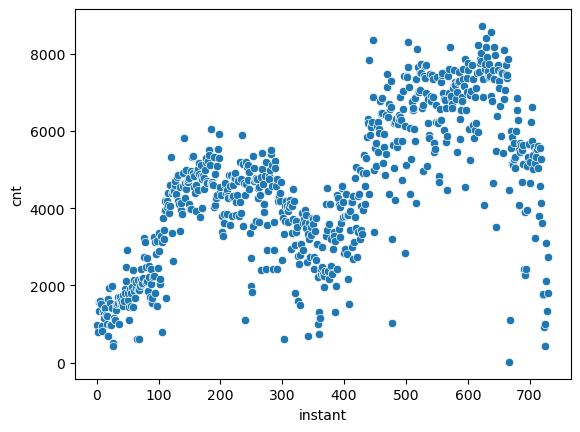

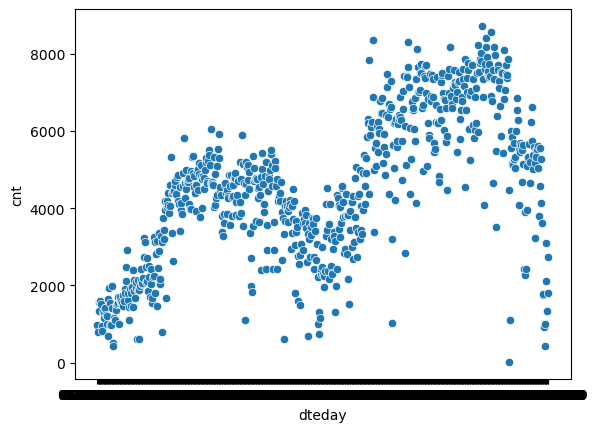

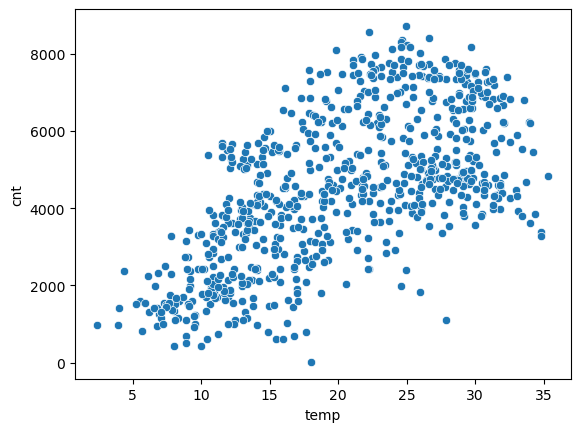

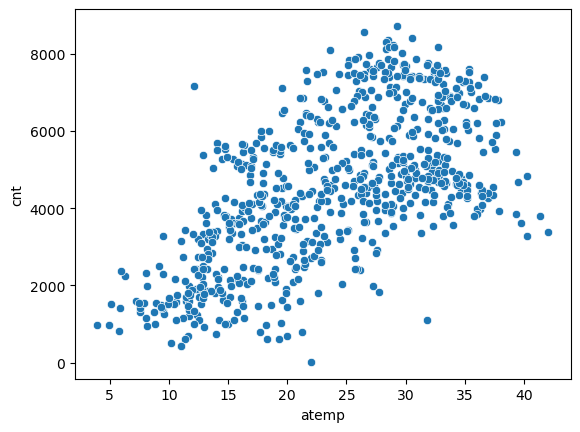

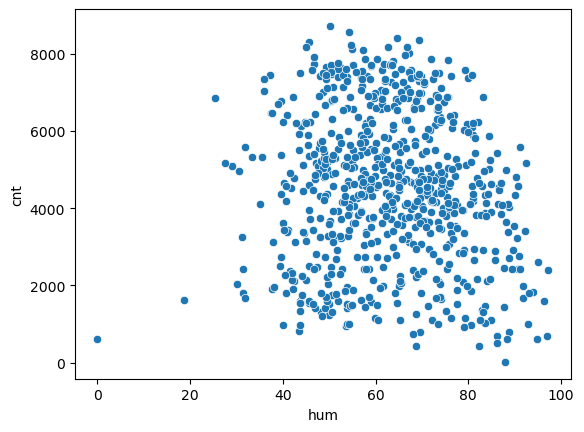

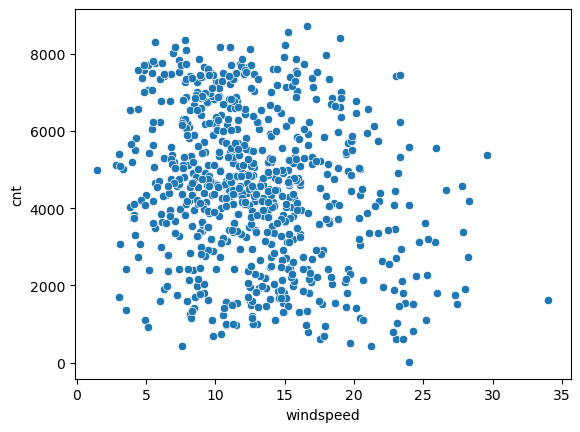

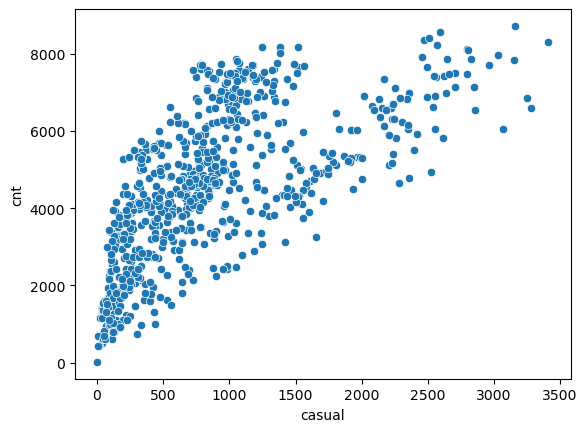

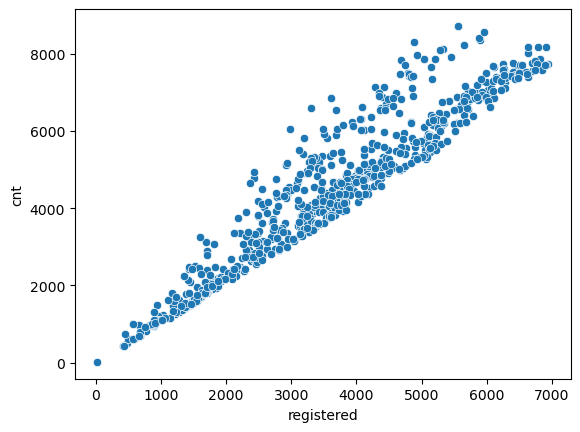

In [217]:
for i in cont_cols:
    sns.scatterplot(x=Bike_df[i],y=Bike_df["cnt"])
    plt.show()

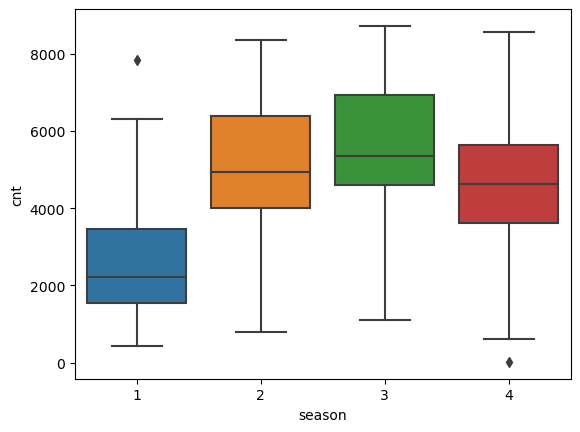

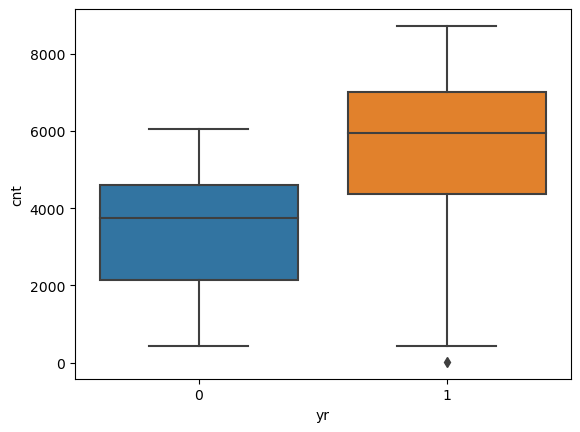

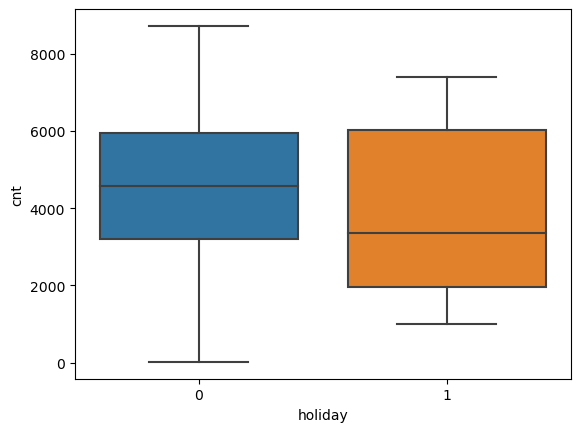

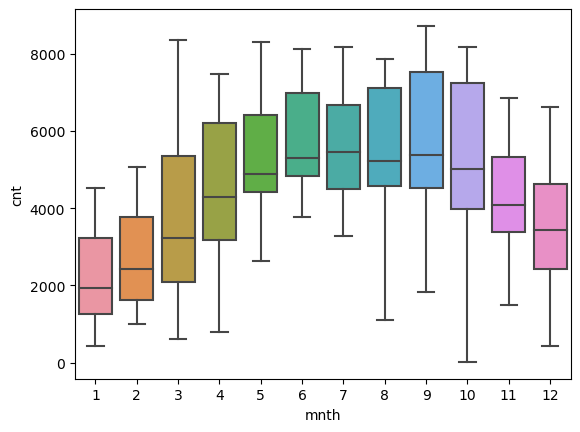

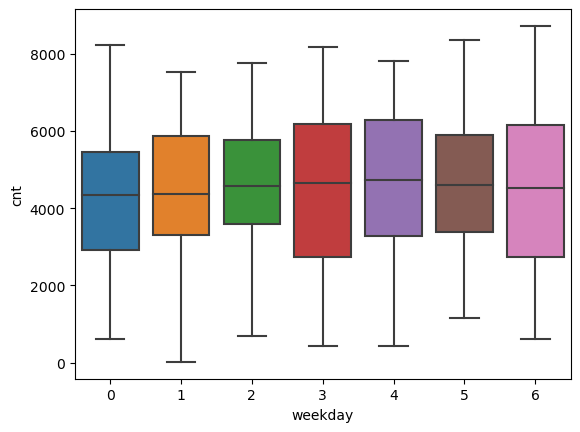

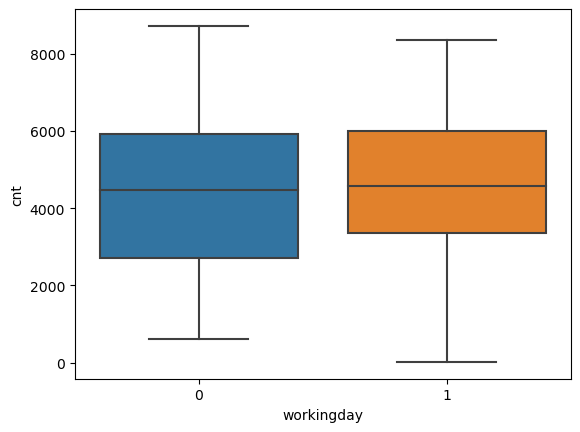

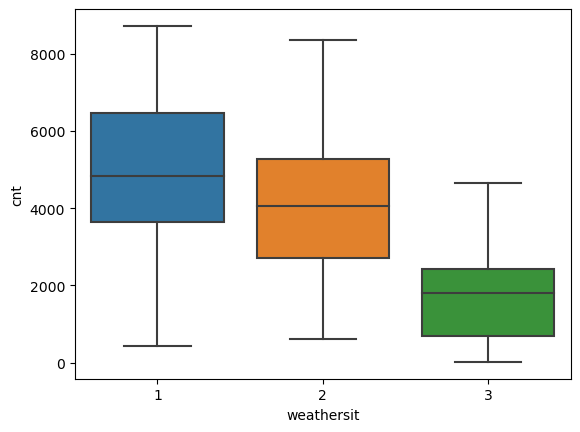

In [218]:
for i in cat_cols:
    sns.boxplot(x=Bike_df[i],y=Bike_df["cnt"])
    plt.show()

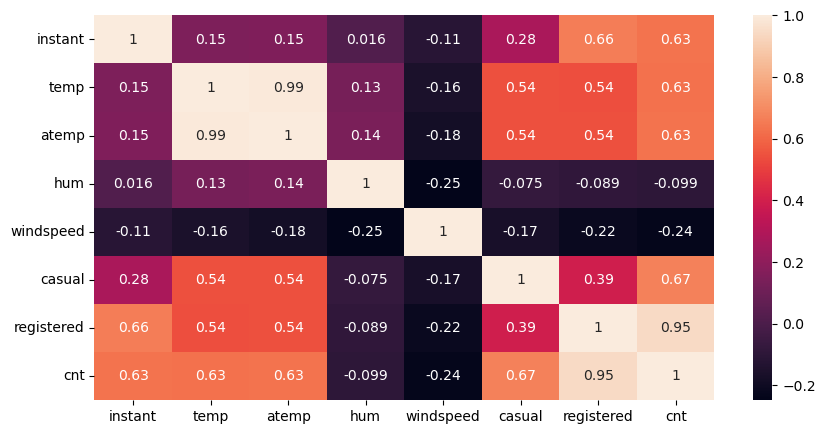

In [219]:
plt.figure(figsize=(10,5))
sns.heatmap(Bike_df[cont_cols+["cnt"]].corr(),annot=True)
plt.show()

In [220]:
#using get_dummies to create dummy variables for categorical columns
df_dum = pd.get_dummies(Bike_df[['season', 'weathersit', 'weekday', 'mnth']], drop_first=True)


df_dum1=pd.get_dummies(Bike_df['season'],drop_first=True)
df_dum2=pd.get_dummies(Bike_df['weathersit'],drop_first=True)
df_dum3=pd.get_dummies(Bike_df['weekday'],drop_first=True)
df_dum4=pd.get_dummies(Bike_df['mnth'],drop_first=True)

In [221]:
Bike_df.shape

(730, 16)

In [222]:
df1 = pd.concat([Bike_df,df_dum],axis=1)


df1=pd.concat([Bike_df,df_dum1],axis=1)
df1=pd.concat([Bike_df,df_dum2],axis=1)
df1=pd.concat([Bike_df,df_dum3],axis=1)
df1=pd.concat([Bike_df,df_dum4],axis=1)

In [223]:
df1.shape

(730, 27)

In [224]:
df1 = df1.drop(["season", "mnth","weekday","weathersit"], axis=1)

In [225]:
df1.shape

(730, 23)

In [227]:
df1.columns

Index([   'instant',     'dteday',         'yr',    'holiday', 'workingday',
             'temp',      'atemp',        'hum',  'windspeed',     'casual',
       'registered',        'cnt',            2,            3,            4,
                  5,            6,            7,            8,            9,
                 10,           11,           12],
      dtype='object')

In [228]:
#we can see column instant is representing an index so we can drop this column

df1.drop(['instant'],axis=1,inplace=True)
df1.drop(['dteday'],axis=1,inplace=True)
df1.drop(['casual'],axis=1,inplace=True)
df1.drop(['registered'],axis=1,inplace=True)

In [229]:
df1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0


In [230]:
df1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0


In [231]:
df1.columns

Index([        'yr',    'holiday', 'workingday',       'temp',      'atemp',
              'hum',  'windspeed',        'cnt',            2,            3,
                  4,            5,            6,            7,            8,
                  9,           10,           11,           12],
      dtype='object')

In [232]:
df1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0


# train-test split

In [233]:
from sklearn.model_selection import train_test_split

In [234]:
X=df1.drop(["cnt"],axis=1)
y=df1["cnt"]

In [235]:
X.columns = X.columns.astype(str)

In [236]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =100)

In [237]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,2,3,4,5,6,7,8,9,10,11,12
367,1,0,1,6.150000,6.31375,44.1250,24.499957,0,0,0,0,0,0,0,0,0,0,0
648,1,0,1,17.835000,21.55835,46.3333,12.166932,0,0,0,0,0,0,0,0,1,0,0
44,0,0,1,17.015000,19.91750,37.5833,27.999836,1,0,0,0,0,0,0,0,0,0,0
705,1,0,1,13.154153,16.09790,76.4167,8.750200,0,0,0,0,0,0,0,0,0,0,1
379,1,0,0,6.833347,8.08125,41.9167,16.834286,0,0,0,0,0,0,0,0,0,0,0


# Z-value

In [238]:
X_train=(X_train-X_train.mean())/X_train.std()
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,2,3,4,5,6,7,8,9,10,11,12
367,0.972135,-0.167693,0.704687,-1.882464,-2.131745,-1.350708,2.234862,-0.281685,-0.315659,-0.288695,-0.309065,-0.288695,-0.285205,-0.315659,-0.29559,-0.318924,-0.29559,-0.309065
648,0.972135,-0.167693,0.704687,-0.306487,-0.240948,-1.192918,-0.119042,-0.281685,-0.315659,-0.288695,-0.309065,-0.288695,-0.285205,-0.315659,-0.29559,3.130177,-0.29559,-0.309065
44,-1.026903,-0.167693,0.704687,-0.417082,-0.444464,-1.818132,2.902856,3.543988,-0.315659,-0.288695,-0.309065,-0.288695,-0.285205,-0.315659,-0.29559,-0.318924,-0.29559,-0.309065
705,0.972135,-0.167693,0.704687,-0.937801,-0.918211,0.956630,-0.771166,-0.281685,-0.315659,-0.288695,-0.309065,-0.288695,-0.285205,-0.315659,-0.29559,-0.318924,-0.29559,3.230029
379,0.972135,-0.167693,-1.416639,-1.790299,-1.912521,-1.508497,0.771778,-0.281685,-0.315659,-0.288695,-0.309065,-0.288695,-0.285205,-0.315659,-0.29559,-0.318924,-0.29559,-0.309065


In [239]:
X_test=(X_test-X_test.mean())/X_test.std()
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,2,3,4,5,6,7,8,9,10,11,12
184,-0.892733,5.292150,-1.710488,1.101193,1.021559,0.137062,-1.429568,-0.311568,-0.255428,-0.337223,-0.28447,-0.337223,2.657519,-0.255428,-0.311568,-0.239946,-0.311568,-0.28447
535,1.112483,-0.187665,0.580624,1.393399,1.349884,-0.165012,-0.999233,-0.311568,-0.255428,-0.337223,-0.28447,2.945083,-0.373714,-0.255428,-0.311568,-0.239946,-0.311568,-0.28447
299,-0.892733,-0.187665,0.580624,-0.242093,-0.209828,1.290418,0.118115,-0.311568,-0.255428,-0.337223,-0.28447,-0.337223,-0.373714,-0.255428,-0.311568,4.139064,-0.311568,-0.28447
221,-0.892733,-0.187665,0.580624,1.310535,1.137186,-1.271680,0.151322,-0.311568,-0.255428,-0.337223,-0.28447,-0.337223,-0.373714,3.888182,-0.311568,-0.239946,-0.311568,-0.28447
152,-0.892733,-0.187665,0.580624,1.040132,0.894651,-2.057063,1.376185,-0.311568,-0.255428,-0.337223,-0.28447,2.945083,-0.373714,-0.255428,-0.311568,-0.239946,-0.311568,-0.28447


# Scaling and feature selection


In [240]:
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LinearRegression

In [241]:
eliminator = LinearRegression()
selector = RFE(eliminator, n_features_to_select=10)


selector = selector.fit(X_train,y_train)
selector.support_

array([ True, False, False,  True,  True,  True,  True, False, False,
        True,  True, False, False, False,  True,  True,  True, False])

In [242]:
X_train.columns[selector.support_]

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', '4', '5', '9', '10', '11'], dtype='object')

In [243]:
selected_features = X_train.columns[selector.support_]

In [244]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [245]:
X_train_sm = sm.add_constant(X_train) 
X_test_sm = sm.add_constant(X_test)

In [246]:
model1 = sm.OLS(y_train,X_train_sm)
res1 = model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     202.7
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          7.34e-181
Time:                        14:29:18   Log-Likelihood:                -4813.3
No. Observations:                 584   AIC:                             9649.
Df Residuals:                     573   BIC:                             9697.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4505.2671     38.381    117.384      0.000    4429.883    4580.651
yr           984.1938     38.800     25.366      0.000     907.986    1060.402
temp         709.4013    289.513      2.450      0.015     140.765    1278.037
atemp        452.4738    291.098      1.554      0.121    -119.276    1024.224
hum         -401.6029     41.809     -9.606      0.000    -483.720    -319.486
windspeed   -360.8543     41.922     -8.608      0.000    -443.193    -278.516
4            150.8954     40.224      3.751      0.000      71.892     229.899
5            194.5218     40.677      4.782      0.000     114.627     274.416
9            256.9593     40.807      6.297      0.000     176.810     337.109
10           338.3258     40.365      8.382      0.000     259.044     417.608
11           222.4410     40.006      5.560      0.000     143.864     301.018
==============================================================================
Omnibus:                       83.498   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.498
Skew:                          -0.821   Prob(JB):                     1.16e-36
Kurtosis:                       5.025   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [247]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif_data=pd.DataFrame() 
vif_data["Feature"]=X_train.columns 
vif_data["VIF"]=[variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns))] 
vif_data

,Feature,VIF
0,yr,1.020239
1,temp,56.802833
2,atemp,57.426666
3,hum,1.184588
4,windspeed,1.190991
5,4,1.096464
6,5,1.121330
7,9,1.128497
8,10,1.104202
9,11,1.084647


In [248]:
X_train_sm = X_train_sm.drop(['temp'],axis=1)
X_test_sm = X_test_sm.drop(['temp'],axis=1)

In [249]:
X_train_sm = X_train_sm.drop(['atemp'],axis=1)
X_test_sm = X_test_sm.drop(['atemp'],axis=1)

In [250]:
model2 = sm.OLS(y_train,X_train_sm)
res2 = model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     66.04
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           1.91e-76
Time:                        14:29:21   Log-Likelihood:                -5064.6
No. Observations:                 584   AIC:                         1.015e+04
Df Residuals:                     575   BIC:                         1.019e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4505.2671     58.915     76.470      0.000    4389.552    4620.983
yr          1078.9006     59.315     18.189      0.000     962.400    1195.401
hum         -311.1733     63.945     -4.866      0.000    -436.767    -185.579
windspeed   -529.5948     62.131     -8.524      0.000    -651.627    -407.562
4            162.9142     61.118      2.666      0.008      42.873     282.955
5            382.2500     61.432      6.222      0.000     261.591     502.908
9            467.5516     61.562      7.595      0.000     346.637     588.466
10           340.2053     61.581      5.525      0.000     219.255     461.156
11            41.6431     60.392      0.690      0.491     -76.972     160.258
==============================================================================
Omnibus:                       18.367   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.459
Skew:                          -0.436   Prob(JB):                     5.95e-05
Kurtosis:                       2.799   Cond. No.                         1.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""